<a href="https://colab.research.google.com/github/syedayazsa/UnderstandingTF2.0-Projects/blob/master/Project_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION TO TENSORFLOW 2.0: MNIST CLASSIFICATION**

**Importing Libraries**

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

**Loading, Splitting and Preprocessing the Data**

In [0]:
mnist = mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

In [3]:
x_train.shape

(60000, 28, 28)

**Building the Neural Network**

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.09808695, 0.1537913 , 0.11399372, 0.10080316, 0.08185061,
        0.18139067, 0.06178897, 0.03560661, 0.0954515 , 0.07723662]],
      dtype=float32)

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.0997275 , 0.10544039, 0.10132653, 0.09999875, 0.09812137,
        0.10839102, 0.0961725 , 0.09368715, 0.09946502, 0.09766968]],
      dtype=float32)

**Compiling and Training the Neural Network**

In [0]:
model.compile(optimizer='adam', loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs = 5, verbose = 1, shuffle = True, validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.9145 - val_loss: 0.1448 - val_accuracy: 0.9547
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1428 - accuracy: 0.9573 - val_loss: 0.1100 - val_accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9673 - val_loss: 0.0881 - val_accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9722 - val_loss: 0.0800 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9767 - val_loss: 0.0727 - val_accuracy: 0.9756


**Plotting Model Performance**

Text(0, 0.5, 'Accuracy')

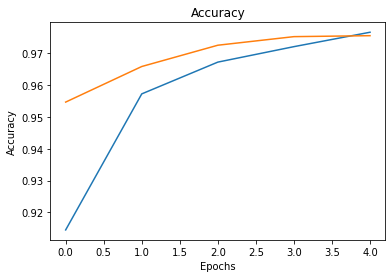

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

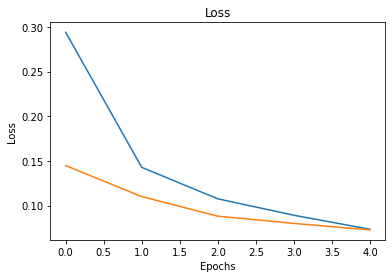

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [11]:
model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9756


[0.07272649556398392, 0.975600004196167]

**Saving the Model**

In [0]:
model.save('mnist.h5')